Most of the steps below have been copied from the scanpy tutorial: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc

In [5]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor="white", vector_friendly=False)

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1


Make sure that the packages that you have match the ones below IF you want to verify our results and obtain exactly the same results as described below. If you want to simply analyse your own dataset, then most likely later versions will also be fine.

In [6]:
pip list

Package                       Version
----------------------------- -------------------
adjustText                    0.7.3
aiohttp                       3.7.4.post0
aiohttp-cors                  0.7.0
aioredis                      1.3.1
anndata                       0.7.6
annoy                         1.17.0
anyio                         2.2.0
arboreto                      0.1.6
argon2-cffi                   20.1.0
async-generator               1.10
async-timeout                 3.0.1
attrs                         20.3.0
Babel                         2.9.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bash-kernel                   0.7.2
bbknn                         1.4.1
bleach                        3.3.0
blessings                     1.7
blis                          0.7.4
boltons                       20.2.1
brotlipy                      0.7.0
cachetools                    4.2.1
catalogue                     1.0.0
certifi                       2020.12.5
c

# Read the adatas from both samples and concatenate them

In [81]:
!md5sum simulate_10x/1-A/outs/filtered_feature_bc_matrix/matrix.mtx.gz
!md5sum simulate_10x/1-B/outs/filtered_feature_bc_matrix/matrix.mtx.gz

b892bbd07227326dad3f6ef5f02f9ce4  simulate_10x/1-A/outs/filtered_feature_bc_matrix/matrix.mtx.gz
2bdfc6ba9053dbd44851b301ff253fe7  simulate_10x/1-B/outs/filtered_feature_bc_matrix/matrix.mtx.gz


In [7]:
adata1 = sc.read_10x_mtx(
    "simulate_10x/1-A/outs/filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,
)  # write a cache file for faster subsequent reading

... reading from cache file cache/simulate_10x-1-A-outs-filtered_feature_bc_matrix-matrix.h5ad


In [8]:
adata1.obs_names = "A_" + adata1.obs_names

In [9]:
adata2 = sc.read_10x_mtx(
    "simulate_10x/1-B/outs/filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,
)  # write a cache file for faster subsequent reading

... reading from cache file cache/simulate_10x-1-B-outs-filtered_feature_bc_matrix-matrix.h5ad


In [10]:
adata2.obs_names = "B_" + adata2.obs_names

In [11]:
adata = adata1.concatenate(adata2, index_unique=None)

Double-check that the barcodes have a sample prefix (A or B)

In [12]:
adata.obs_names

Index(['A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC',
       'A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC',
       'A_GATCTAGGTA_ACCTTGTATG_AACAACCATC',
       'A_TTAACGAAGG_ACCTTGTATG_AACAACCATC',
       'A_ACCTGAGATG_ACGAGACCAA_AACAACCATC',
       'A_GTGCTGACAC_ACGAGACCAA_AACAACCATC',
       'A_GACATTCTCT_AGTCCACCGT_AACAACCATC',
       'A_TTACTACGCA_ATACCAGAAG_AACAACCATC',
       'A_GGACGAACGG_ATCTGGTCAG_AACAACCATC',
       'A_CTCGATTCAT_ATGTGTGTAC_AACAACCATC',
       ...
       'B_AGGACATGAA_TCTGACACTA_TTGGATACGT',
       'B_AAGTAAGCAC_TGAATGTGAG_TTGGATACGT',
       'B_TTACTACGCA_TGCGTACAGT_TTGGATACGT',
       'B_AAGTAAGCAC_TGCTCTGACA_TTGGATACGT',
       'B_TGGCTTAACA_TGCTCTGACA_TTGGATACGT',
       'B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT',
       'B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT',
       'B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT',
       'B_TACATAGAGG_TTGAGGCATC_TTGGATACGT',
       'B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT'],
      dtype='object', length=9693)

In [13]:
adata.var_names_make_unique()

Write the adata as a checkpoint.

In [14]:
adata.write('scanpy/HYR__20210412_mouse_cortex.hdf5')

... storing 'feature_types' as categorical


In [15]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Quickly look at some metrics

In [16]:
adata.obs.median()

n_genes_by_counts              1668.000000
log1p_n_genes_by_counts           7.419980
total_counts                   3422.000000
log1p_total_counts                8.138272
pct_counts_in_top_50_genes       25.932836
pct_counts_in_top_100_genes      35.318925
pct_counts_in_top_200_genes      46.481041
pct_counts_in_top_500_genes      64.631529
dtype: float64

In [17]:
adata.obs.mean()

n_genes_by_counts              1758.190240
log1p_n_genes_by_counts           7.411264
total_counts                   3939.879883
log1p_total_counts                8.140127
pct_counts_in_top_50_genes       25.951552
pct_counts_in_top_100_genes      35.329148
pct_counts_in_top_200_genes      46.610985
pct_counts_in_top_500_genes      64.904155
dtype: float64

Now, filter the cells. These filters are mostly meaningless as STARsolo already filtered cells for us.

In [18]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_genes(adata, min_counts=3)

adata.var["mt"] = adata.var_names.str.startswith(
    "mt-"
)  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

filtered out 10954 genes that are detected in less than 3 cells


In [19]:
adata.obs

batch  n_genes_by_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC     0               2756   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC     0               3005   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC     0               2491   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC     0               1888   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC     0               2825   
...                                  ...                ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT     1                934   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT     1                956   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT     1               2707   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT     1               2231   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT     1               1176   

                                    log1p_n_genes_by_counts  total_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                 7.922624        7319.0   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                 8.008698        8789.0   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                 7.820841        5689.0   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                 7.543803        4044.0   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                 7.946971        7267.0   
...                                                     ...           ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                 6.840547        1485.0   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                 6.863803        1544.0   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                 7.904335        7717.0   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                 7.711101        5113.0   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                 7.070724        1845.0   

                                    log1p_total_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC            8.898639   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC            9.081484   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC            8.646465   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC            8.305237   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC            8.891374   
...                                                ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT            7.303843   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT            7.342779   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT            8.951440   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT            8.539932   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT            7.520776   

                                    pct_counts_in_top_50_genes  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                   26.294222   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                   23.128555   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                   23.290561   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                   27.077151   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                   24.408365   
...                                                        ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                   28.350168   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                   26.813472   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                   25.563618   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                   24.814235   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                   23.739837   

                                    pct_counts_in_top_100_genes  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                    35.814779   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                    32.081911   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                    31.200562   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                    36.424332   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                    32.526142   
...                                                         ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                    37.373737   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                    36.658031   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                    35.371858   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                    34.082910   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                    32.682927   

                                    pct_counts_in_top_200_

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 1, :]

Quickly look at the data in violin plots.

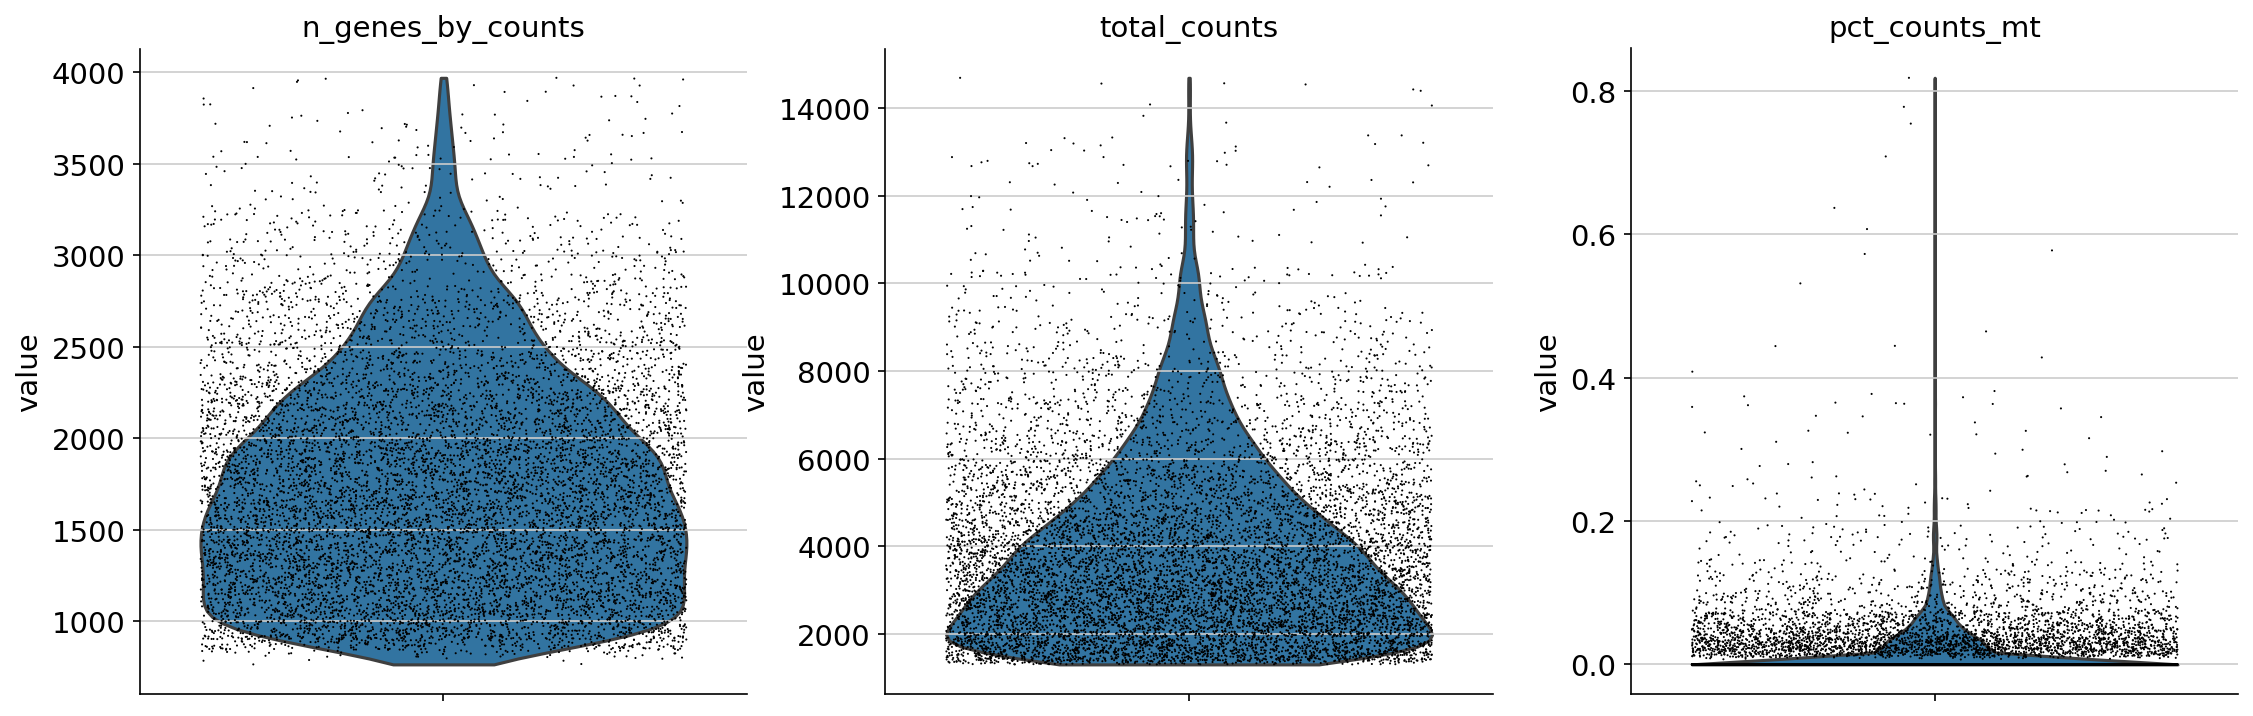

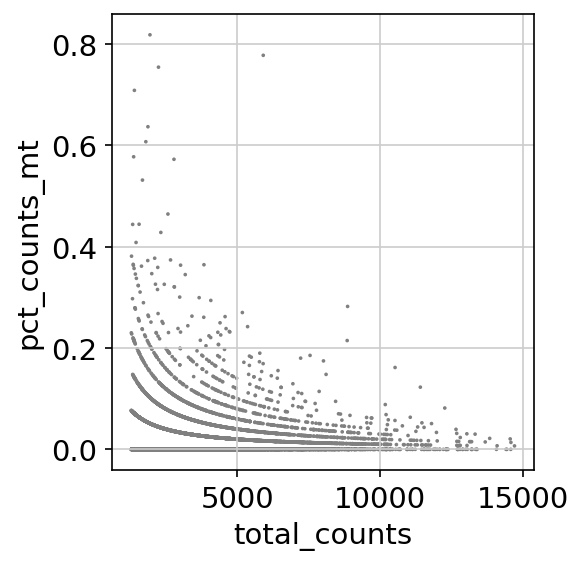

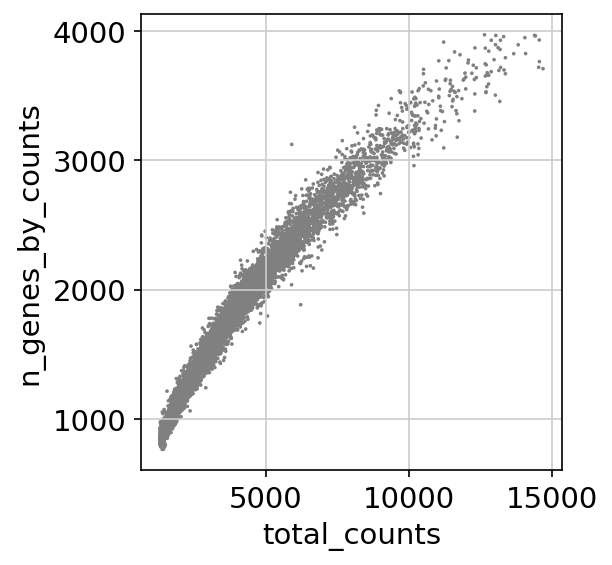

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

# Scrublet
Removing doublets. You can finetune the scrublet threshold to your liking.

In [25]:
sc.external.pp.scrublet(adata, threshold=0.25)

Running Scrublet
filtered out 42 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/media/data/users/fderop/software/miniconda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    Scrublet finished (0:00:08)
Trying to set attribute `.obs` of view, copying.


Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 58.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.7%


(<Figure size 1200x450 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

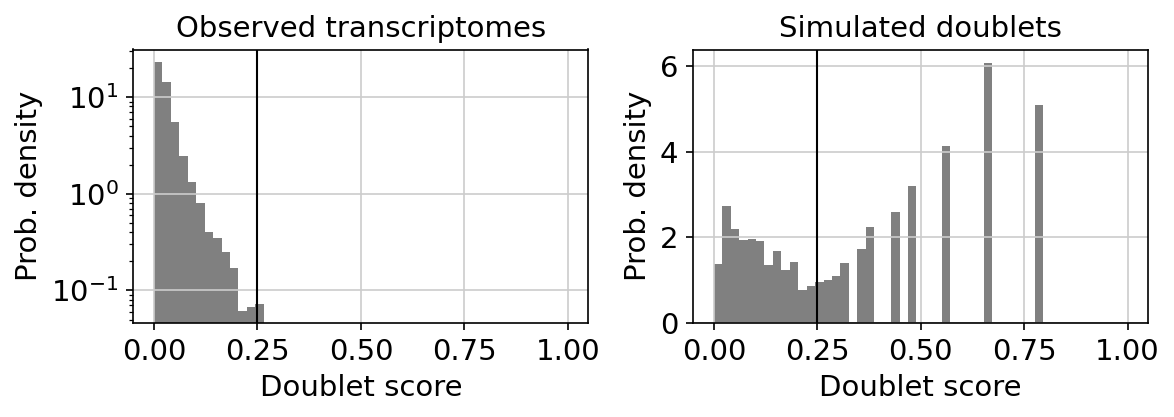

In [28]:
sc.external.pl.scrublet_score_distribution(adata)

In [29]:
adata = adata[adata.obs["predicted_doublet"] == False]

# Normalize counts
We normalize the counts per genes in cells to total counts in cells and log-normalize.

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/media/data/users/fderop/software/miniconda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


Calculate highly variable genes.

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


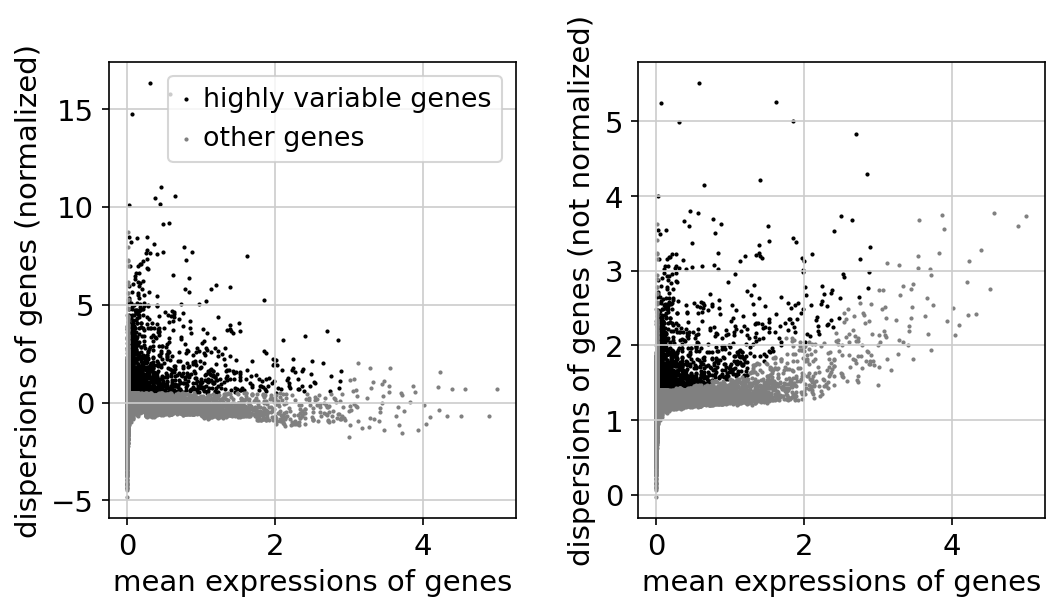

In [31]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

Regress out total counts and mitochondrial counts.

In [32]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:23)


In [33]:
sc.pp.scale(adata, max_value=10)

# We can inspect the called cells

In [36]:
adata.obs

batch  n_genes_by_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC     0               2756   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC     0               3005   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC     0               2491   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC     0               1888   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC     0               2825   
...                                  ...                ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT     1                934   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT     1                956   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT     1               2707   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT     1               2231   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT     1               1176   

                                    log1p_n_genes_by_counts  total_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                 7.922624        7319.0   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                 8.008698        8789.0   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                 7.820841        5689.0   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                 7.543803        4044.0   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                 7.946971        7267.0   
...                                                     ...           ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                 6.840547        1485.0   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                 6.863803        1544.0   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                 7.904335        7717.0   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                 7.711101        5113.0   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                 7.070724        1845.0   

                                    log1p_total_counts  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC            8.898639   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC            9.081484   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC            8.646465   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC            8.305237   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC            8.891374   
...                                                ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT            7.303843   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT            7.342779   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT            8.951440   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT            8.539932   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT            7.520776   

                                    pct_counts_in_top_50_genes  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                   26.294222   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                   23.128555   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                   23.290561   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                   27.077151   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                   24.408365   
...                                                        ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                   28.350168   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                   26.813472   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                   25.563618   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                   24.814235   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                   23.739837   

                                    pct_counts_in_top_100_genes  \
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC                    35.814779   
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC                    32.081911   
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC                    31.200562   
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC                    36.424332   
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC                    32.526142   
...                                                         ...   
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT                    37.373737   
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT                    36.658031   
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT                    35.371858   
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT                    34.082910   
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT                    32.682927   

                                    pct_counts_in_top_200_

The statistics we report in our BiorXiv preprint:

In [38]:
adata.obs.median()

n_genes_by_counts              1661.000000
log1p_n_genes_by_counts           7.416378
total_counts                   3403.500000
log1p_total_counts                8.132854
pct_counts_in_top_50_genes       25.958375
pct_counts_in_top_100_genes      35.359664
pct_counts_in_top_200_genes      46.521937
pct_counts_in_top_500_genes      64.681238
n_genes                        1662.000000
total_counts_mt                   0.000000
pct_counts_mt                     0.000000
doublet_score                     0.021615
predicted_doublet                 0.000000
dtype: float64

In [39]:
adata.write('scanpy/HYR__20210412_mouse_cortex.hdf5')

# PCA
The first step in dimensionality reduction.

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


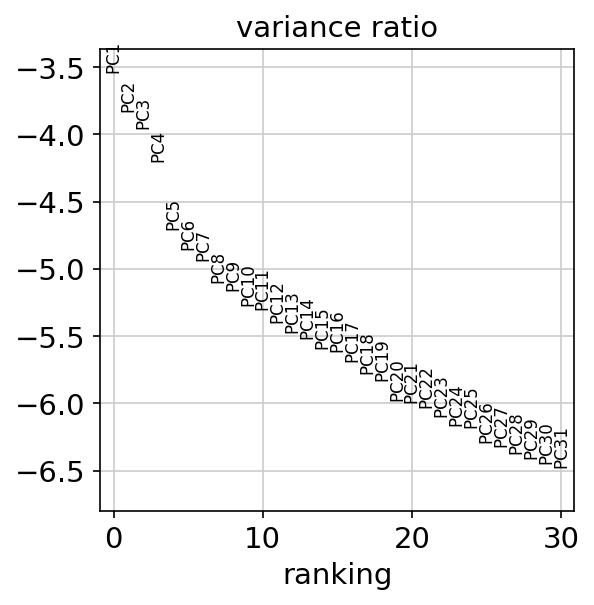

In [40]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata, log=True)

Calculate neighbours and leiden clustering for some different resolutions

In [41]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [42]:
res = 0.6
sc.tl.leiden(adata, resolution=res, key_added="leiden_" + str(res))
res = 0.9
sc.tl.leiden(adata, resolution=res, key_added="leiden_" + str(res))
res = 1
sc.tl.leiden(adata, resolution=res, key_added="leiden_" + str(res))
res = 1.2
sc.tl.leiden(adata, resolution=res, key_added="leiden_" + str(res))

running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden_0.9', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden_1', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden_1.2', the cluster labels (adata.obs, categorical) (0:00:00)


# UMAP
Calculate and plot umap dimreduc

In [43]:
sc.tl.umap(adata, random_state=0)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


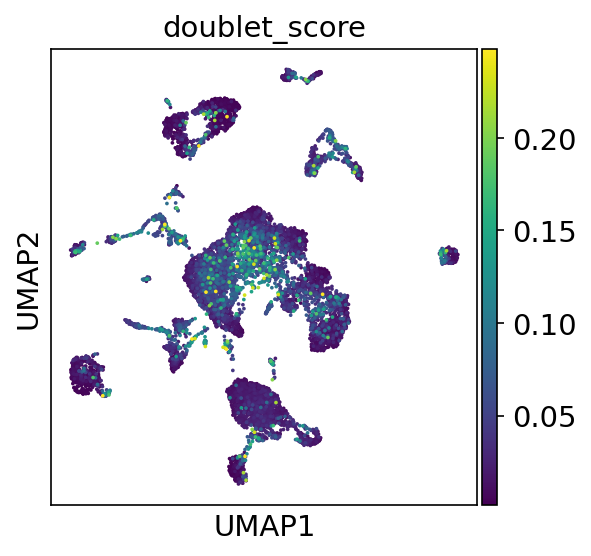

In [44]:
sc.pl.umap(adata, color="doublet_score")

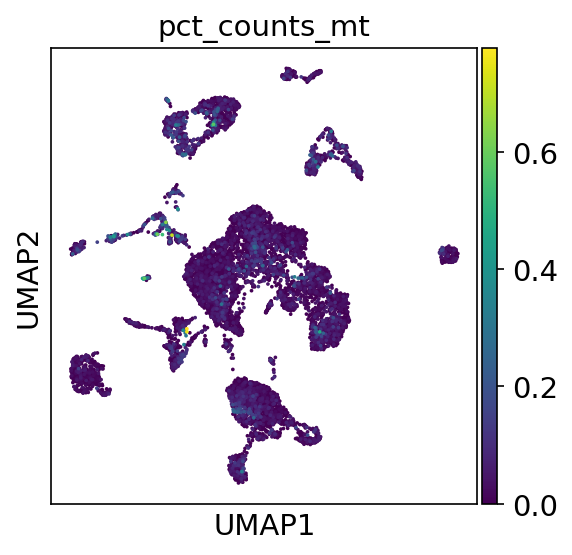

In [45]:
sc.pl.umap(adata, color="pct_counts_mt")

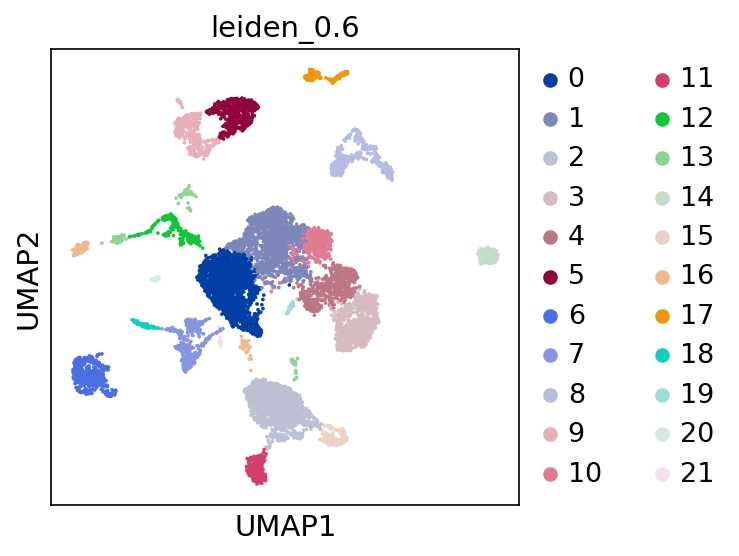

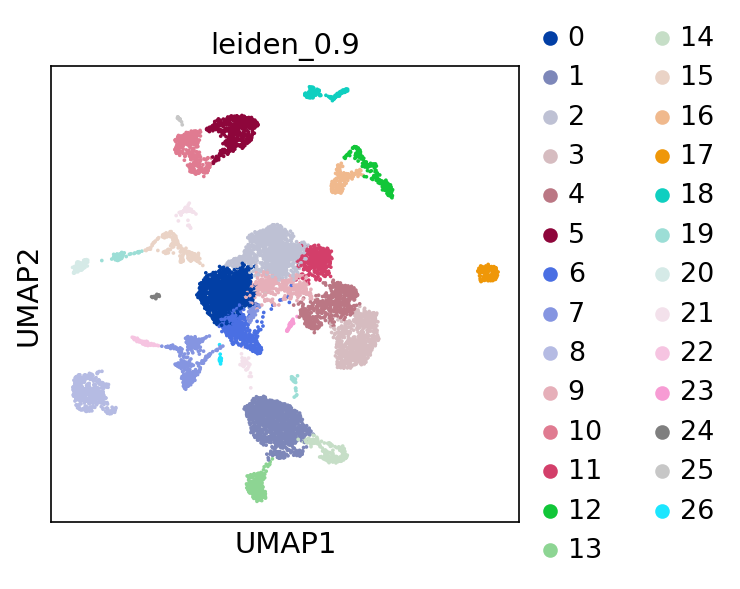

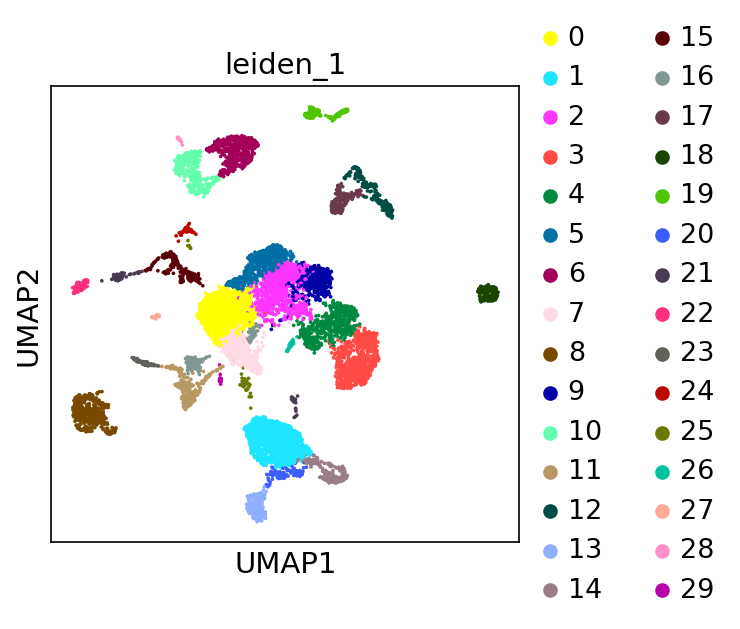

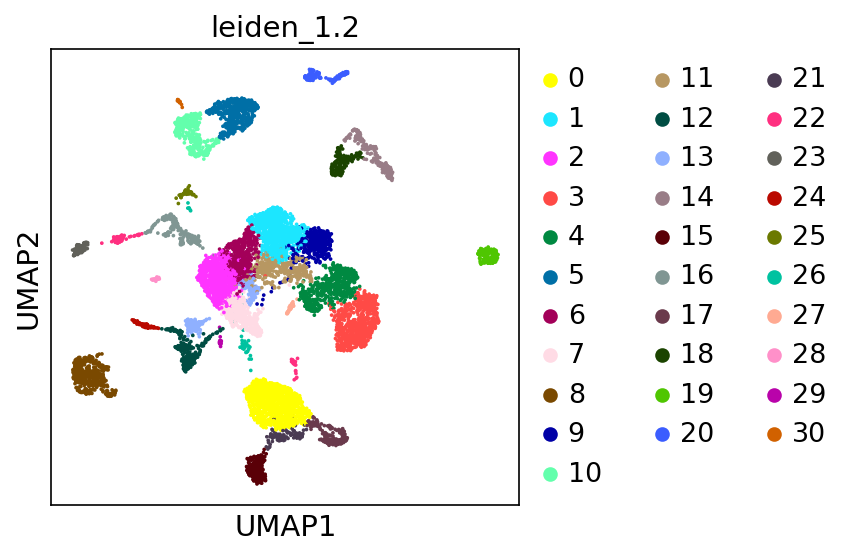

In [46]:
sc.pl.umap(adata, color="leiden_" + str(0.6))
sc.pl.umap(adata, color="leiden_" + str(0.9))
sc.pl.umap(adata, color="leiden_" + str(1))
sc.pl.umap(adata, color="leiden_" + str(1.2))

# tSNE
Calculate and plot tSNE

In [47]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:23)


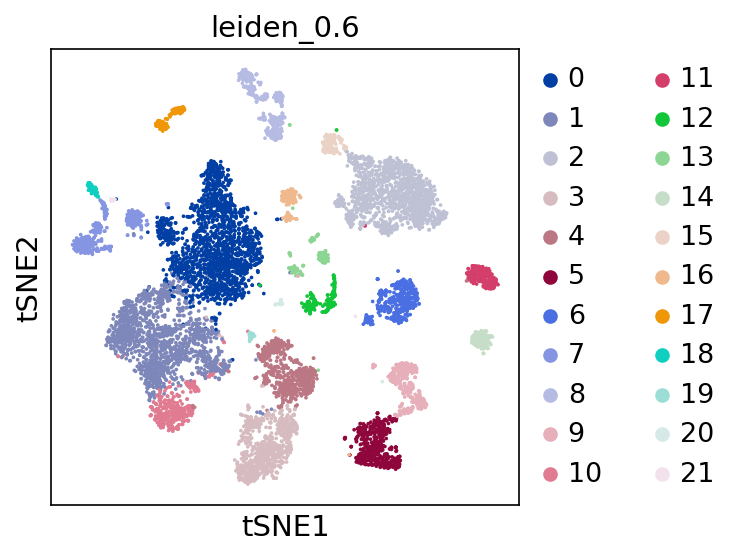

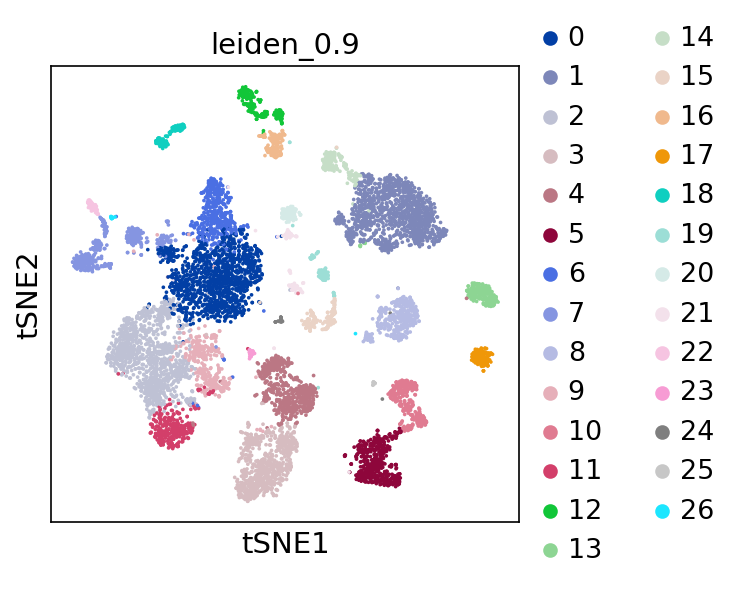

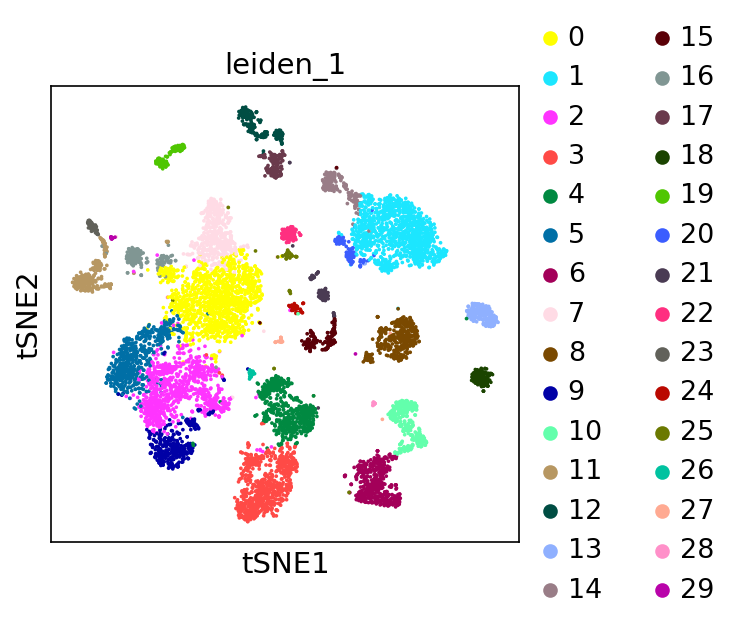

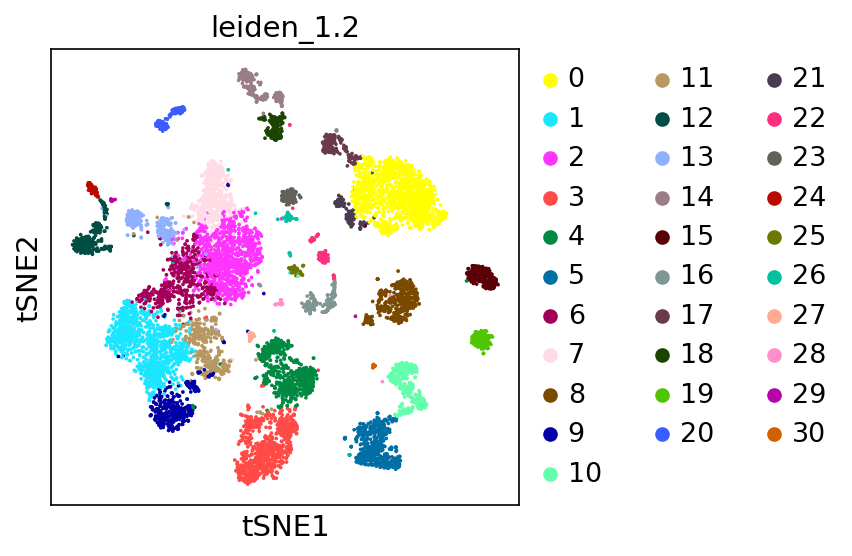

In [49]:
sc.pl.tsne(adata, color="leiden_" + str(0.6))
sc.pl.tsne(adata, color="leiden_" + str(0.9))
sc.pl.tsne(adata, color="leiden_" + str(1))
sc.pl.tsne(adata, color="leiden_" + str(1.2))

# Annotation
We pick leiden resolution 1 to annotate further.

In [53]:
res = 1

Visualise some markers:

In [54]:
markers_dict = {
    "AST": ["Nfib", "Sox9", "Gfap", "Aqp4", "Fam107a", "Cbs", "Ppp1r3g", "Gm11627"],  # Ast"Fam107a Cbs Ppp1r3g Gm11627".split()
    "MGL": "P2ry12 Gpr34 Selplg".split(),
    "Olig": ["Olig2", "Mbp"],  # Olig differentiation
    "MOL": "Opalin Ninj2 Hapln2 Dock5 Klk6 Sox10".split(),
    "OPC": "Pdgfra C1ql1 ".split(),
    "ENDO": ["Lef1", "Flt1", "Pecam1"],  # Endo, left out Lef1
    "PVM": "Cd74".split(),
    "PER": "Higd1b Degs2 Ndufa4l2 Rgs5 Flt1 Ecscr Tbxa2r Cd93".split(),
    "PIR": ["Six4"],
    "Neuron": ["Rbfox3"],  # Neuron
    "INT": ["Gad2", "Vip"],  # Int
    "MGE": ["Lhx6", "Gpx3", "Pde11a", "Sst", "Pvalb"],  # MGE"Lhx6 Gpx3 Pde11a".split()
    "CGE": "Teddm3 Lamp5 Vip Cxcl14".split(),
    "LGE": ["Kit", "Adarb2"],  # LGE,
    "Ex": ["Satb2", "Snap23", "Slc17a7"],  # Ex
    "L2/3": ["Cux1", "Cux2", "Otof", "Rasgrf2", "Pou3f2", "Tshz2", "Ddit4l", "Lamp5", "Egr1"],  # L2/3
    "L4": ["Rora", "Rorb"],  # L4
    "L4-IT": "Krt12 Tcap Lrrtm1 Cbln4".split(),
    "L5": "Deptor Fezf2 Kcng1 Obscn".split(),
    "NP": ["Tshz2", "Trhr", "Slc17a8", "Trhr"],  # NP
    "L6IT": ["Car3", "Car12", "Oprk1"],  # L6IT
    "L6CT": ["Ly6d"],  # L6CT
    "L6b": ["Nr4a2"],  # L6b
    "L6": ["Foxp2", "Ptprt", "Galnt14"],
}

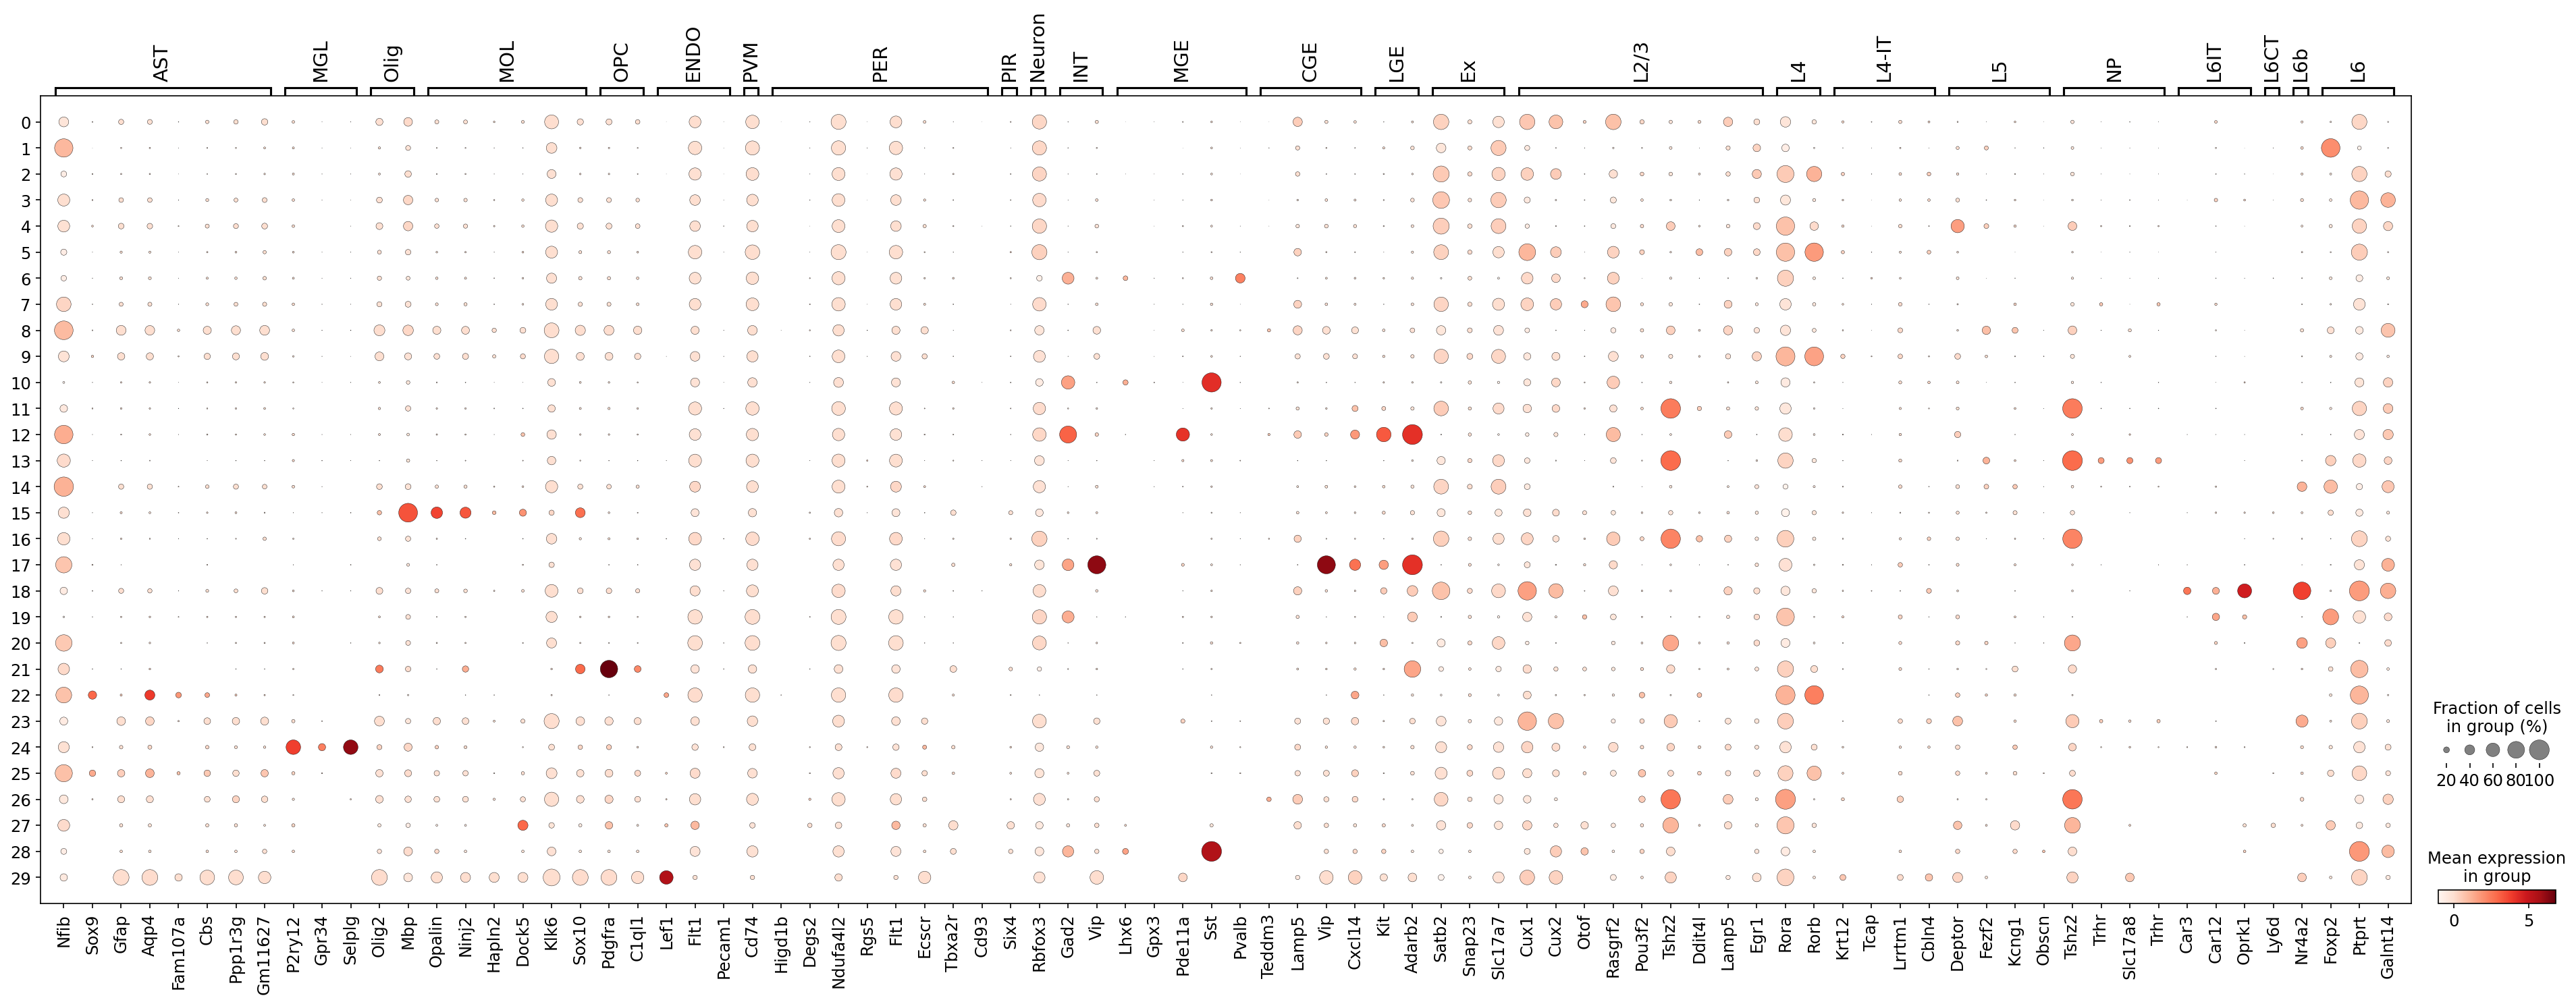

In [56]:
sc.pl.dotplot(adata, markers_dict, groupby="leiden_" + str(res))

# Write loom file with raw counts

Now, we use [SCope](https://scope.aertslab.org/) to explore the gene expression of several markers within the UMAP or tSNE and annotate. During this exploration, I also noticed some small populations that were not picked up by the leiden clustering (resolution too low), but did have a specific expression of select marker genes. SCope allows you to select those cells using the lasso tool and export their barcodes. Ultimately, this led to the following to the following annotation:

In [57]:
# Load class
class loom_file_creation:
    import os

    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import scanpy as sc
    import seaborn as sns

    def __init__(self, dgem, meta):
        import numpy as np
        import pandas as pd

        self.dgem = dgem
        self.meta = meta
        self.CPM = self.dgem / self.dgem.sum() * 1e6
        self.logCPM = np.log1p(self.CPM)
        self.metaJson = {}
        self.metaJson["metrics"] = []
        self.metaJson["annotations"] = []
        # initialize counters
        self.default_embedding_counter = 0
        self.embeddings_id = 1
        self.clusterings_id = 0
        self.col_attrs_counter = 0
        self.row_attrs_counter = 0
        self.attrs_counter = 0
        # add other embeddings
        self.Embeddings_X = pd.DataFrame()
        self.Embeddings_Y = pd.DataFrame()
        # add clusterings
        self.clusterings = pd.DataFrame(index=self.meta.index)

    def add_default_embedding(self, x, y, name="default"):
        self.main_dr = self.meta[[x, y]]
        self.main_dr.columns = ["_X", "_Y"]
        self.metaJson["embeddings"] = [{"id": -1, "name": name}]
        self.default_embedding_counter = 1

    def add_other_embedding(self, x, y, name):
        # every extra embedding is put in these dataframes as columns
        self.Embeddings_X[str(self.embeddings_id)] = self.meta[x]
        self.Embeddings_Y[str(self.embeddings_id)] = self.meta[y]
        self.metaJson["embeddings"].append({"id": self.embeddings_id, "name": name})
        self.embeddings_id += 1

    # here you can add description of the cluster
    def add_numeric_clustering(self, res, group, name, annotated=None):
        # add all cluster IDs to meta
        if self.clusterings_id == 0:
            self.metaJson["clusterings"] = [
                {
                    "id": self.clusterings_id,
                    "group": group,
                    "name": name,
                    "clusters": [],
                }
            ]
        if self.clusterings_id > 0:
            # add all cluster IDs to meta
            self.metaJson["clusterings"].append(
                {
                    "id": self.clusterings_id,
                    "group": group,
                    "name": name,
                    "clusters": [],
                }
            )
        # get annotation for numeric values (count annotation for each numeric value, take the annotation that occurs the most)
        if annotated in self.meta.columns:
            annotation_dataframe = pd.DataFrame(
                meta.groupby(res)[annotated].value_counts().groupby(res).head(n=1)
            )
            annotation_dataframe.columns = ["test"]
            annotation_dataframe = annotation_dataframe.reset_index()
            annotation_dataframe.index = annotation_dataframe[res]
            annotation_dataframe.drop(res, axis=1, inplace=True)
            annotation_dataframe.drop("test", axis=1, inplace=True)
            for i in range(max(set([int(x) for x in self.meta[res]])) + 1):
                clustDict = {}
                clustDict["id"] = i
                clustDict["description"] = annotation_dataframe.loc[i, annotated]
                self.metaJson["clusterings"][self.clusterings_id]["clusters"].append(
                    clustDict
                )
        else:
            for i in range(max(set([int(x) for x in self.meta[res]])) + 1):
                clustDict = {}
                clustDict["id"] = i
                clustDict["description"] = f"Unannotated Cluster {i}"
                self.metaJson["clusterings"][self.clusterings_id]["clusters"].append(
                    clustDict
                )
        # add cluster IDs for every cell to dataframe
        self.clusterings[str(self.clusterings_id)] = self.meta[res].values.astype(
            np.int64
        )
        # increase counter
        self.clusterings_id += 1

    def dfToNamedMatrix(df):
        arr_ip = [tuple(i) for i in df.values]
        dtyp = np.dtype(list(zip(df.dtypes.index, df.dtypes)))
        arr = np.array(arr_ip, dtype=dtyp)
        return arr

    def make_col_attributes(self):
        # define col attributes
        if self.embeddings_id > 1:
            if self.clusterings_id > 0:
                self.col_attrs = {
                    "CellID": np.array(self.meta.index),
                    "Embedding": dfToNamedMatrix(self.main_dr),
                    "Embeddings_X": dfToNamedMatrix(self.Embeddings_X),
                    "Embeddings_Y": dfToNamedMatrix(self.Embeddings_Y),
                    "Clusterings": dfToNamedMatrix(self.clusterings),
                    "ClusterID": np.array(
                        self.clusterings[str(self.clusterings_id - 1)].values
                    ),
                }
            else:
                self.col_attrs = {
                    "CellID": np.array(self.meta.index),
                    "Embedding": dfToNamedMatrix(self.main_dr),
                    "Embeddings_X": dfToNamedMatrix(self.Embeddings_X),
                    "Embeddings_Y": dfToNamedMatrix(self.Embeddings_Y),
                }
        elif self.clusterings_id > 0:
            self.col_attrs = {
                "CellID": np.array(self.meta.index),
                "Embedding": dfToNamedMatrix(self.main_dr),
                "Clusterings": dfToNamedMatrix(self.clusterings),
                "ClusterID": np.array(
                    self.clusterings[str(self.clusterings_id - 1)].values
                ),
            }
        else:
            self.col_attrs = {
                "CellID": np.array(self.meta.index),
                "Embedding": dfToNamedMatrix(self.main_dr),
            }
        self.col_attrs_counter = 1

    def add_annotation(self, annotation):
        if self.col_attrs_counter < 1:
            print("first run make_col_attributes")
        self.metaJson["annotations"].append(
            {"name": annotation, "values": list(set(self.meta[annotation].values))}
        )
        self.col_attrs[annotation] = np.array(self.meta[annotation].values)

    def add_metric(self, metric):
        if self.col_attrs_counter < 1:
            print("first run make_col_attributes")
        self.metaJson["metrics"].append({"name": metric})
        self.col_attrs[metric] = np.array(self.meta[metric].values)

    def make_row_attributes(self):
        self.row_attrs = {"Gene": np.array(self.dgem.index)}
        self.row_attrs_counter = 1

    def make_attributes(self):
        import base64
        import json
        import zlib

        self.attrs = {"MetaData": json.dumps(self.metaJson)}
        self.attrs["MetaData"] = base64.b64encode(
            zlib.compress(json.dumps(self.metaJson).encode("ascii"))
        ).decode("ascii")
        self.attrs_counter = 1

    def create_loomfile(self, path):
        import loompy as lp

        if (
            self.col_attrs_counter == 1
            and self.row_attrs_counter == 1
            and self.default_embedding_counter == 1
            and self.attrs_counter == 1
        ):
            lp.create(
                filename=path,
                layers=(self.dgem).values,
                row_attrs=self.row_attrs,
                col_attrs=self.col_attrs,
                file_attrs=self.attrs,
            )
        else:
            print(
                "Make sure that col_attr, row_attrs, attrs and embedding have been run"
            )


def dfToNamedMatrix(df):
    arr_ip = [tuple(i) for i in df.values]
    dtyp = np.dtype(list(zip(df.dtypes.index, df.dtypes)))
    arr = np.array(arr_ip, dtype=dtyp)
    return arr

In [58]:
adata_raw1 = sc.read_10x_mtx(
    "simulate_10x/1-A/outs/filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,
)  # write a cache file for faster subsequent reading

adata_raw1.obs_names = "A_" + adata_raw1.obs_names

adata_raw2 = sc.read_10x_mtx(
    "simulate_10x/1-B/outs/filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,
)  # write a cache file for faster subsequent reading

adata_raw2.obs_names = "B_" + adata_raw2.obs_names

adata_raw = adata_raw1.concatenate(adata_raw2, index_unique=None)

adata_raw.var_names_make_unique()

# sc.pp.filter_cells(adata_raw, min_genes=200)
# sc.pp.filter_genes(adata_raw, min_cells=3)
# adata_raw.var['mt'] = adata_raw.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
# sc.pp.calculate_qc_metrics(adata_raw, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# adata_raw = adata_raw[adata_raw.obs.n_genes_by_counts < 4000, :]
# adata_raw = adata_raw[adata_raw.obs.pct_counts_mt < 1, :]

# scrublet

# sc.external.pp.scrublet(adata_raw, threshold=0.25)
# adata_raw = adata_raw[adata_raw.obs['predicted_doublet']==False]
adata_raw = adata_raw[
    adata.obs.index
]  # instead of filtering, just subset based on the previous adata
test = adata.obs.index == adata_raw.obs.index
np.unique(test)

... reading from cache file cache/simulate_10x-1-A-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/simulate_10x-1-B-outs-filtered_feature_bc_matrix-matrix.h5ad


array([ True])

In [59]:
# make sure cell types contain no illegal characters such as γ
df = []
meta = []
df = pd.DataFrame(
    adata_raw.X.toarray(), columns=adata_raw.var_names, index=adata_raw.obs_names
).T  # remove .toarray() if not necessary
meta = adata.obs
loomfile = loom_file_creation(df, meta)
meta["UMAP_X"] = adata.obsm["X_umap"][:, 0]
meta["UMAP_Y"] = adata.obsm["X_umap"][:, 1]
loomfile.add_default_embedding(x="UMAP_X", y="UMAP_Y")
meta["TSNE_X"] = adata.obsm["X_tsne"][:, 0]
meta["TSNE_Y"] = adata.obsm["X_tsne"][:, 1]
loomfile.add_other_embedding(x="TSNE_X", y="TSNE_Y", name="tsne")
# loomfile.add_numeric_clustering(res="leiden_0.9",group="leiden_0.9",name="leiden_0.9",annotated='cell_type')
# loomfile.add_numeric_clustering(
#     res="leiden_1", group="leiden_1", name="leiden_1", annotated="cell_type_1"
# )
# loomfile.add_numeric_clustering(res="integrated_snn_res.2",group="Louvain",name="Unannotated")
loomfile.make_col_attributes()
loomfile.make_row_attributes()
# loomfile.add_annotation(annotation="cell_type")
# loomfile.add_annotation(annotation="leiden_1")
# loomfile.add_annotation(annotation="cell_type_1")
# loomfile.add_annotation(annotation="cell_type_collapsed")

loomfile.add_metric(metric="total_counts")
loomfile.add_metric(metric="n_genes")
loomfile.make_attributes()
loomfile.create_loomfile("scanpy/hydrop-rna_mouse_cortex_finalann.loom")

You can upload this loom file now to SCope to visualise it. Our final annotation comprised the following:

In [60]:
res = 1
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    "0": "L2/3 IT",
    "1": "L6 CT",
    "2": "L4/5 IT",
    "3": "L5/6 IT",
    "4": "L5 IT",
    "5": "L4/5 IT'",
    "6": "MGE Pvalb+",
    "7": "L2/3 IT'",
    "8": "L5 PT",
    "9": "L4/5 IT''",
    "10": "MGE Sst+",
    "11": "L2/3 IT APr",
    "12": "CGE Lamp5+",
    "13": "L5 NP",
    "14": "L6b+",
    "15": "MOL",
    "16": "L2/3 IT",
    "17": "CGE Vip+",
    "18": "L6 IT Car3+",
    "19": "D1 MSN",
    "20": "L6 CT'",
    "21": "OPC",
    "22": "AST",
    "23": "L3 IT ENTI",
    "24": "MGL",
    "25": "AST",
    "26": "L3 RSP ACA",
    "27": "VLMC",
    "28": "MGE Chodl+",
    "29": "L2 IT ENTm",
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs["cell_type_" + str(res)] = (
    adata.obs["leiden_" + str(res)].map(cluster2annotation).astype("category")
)

adata.obs["cell_type_finetuned_clean"] = adata.obs["cell_type_1"]

file = "unknown.csv"
newcat = "DBL"

bc = pd.read_csv("scanpy/lasso/" + file)["cellID"]
adata.obs["cell_type_finetuned_clean"].cat.add_categories(newcat, inplace=True)
adata.obs["cell_type_finetuned_clean"].loc[bc] = newcat

file = "dbl.csv"
newcat = "DBL'"

bc = pd.read_csv("scanpy/lasso/" + file)["cellID"]
adata.obs["cell_type_finetuned_clean"].cat.add_categories(newcat, inplace=True)
adata.obs["cell_type_finetuned_clean"].loc[bc] = newcat

file = "np-3.csv"
newcat = "L2 IT"
bc = pd.read_csv("scanpy/lasso/" + file)["cellID"]
adata.obs["cell_type_finetuned_clean"].cat.add_categories(newcat, inplace=True)
adata.obs["cell_type_finetuned_clean"].loc[bc] = newcat

file = "d2_msn.csv"
newcat = "D2 MSN"
bc = pd.read_csv("scanpy/lasso/" + file)["cellID"]
adata.obs["cell_type_finetuned_clean"].cat.add_categories(newcat, inplace=True)
adata.obs["cell_type_finetuned_clean"].loc[bc] = newcat

# Visualise the cell types

In [61]:
import random
from random import randrange
import seaborn as sns

I like to randomly order colours. Otherwise, you might have two subsequent leiden clusters getting a very similar colour.

In [62]:
cmap = sns.color_palette("hls", len(adata.obs["cell_type_finetuned_clean"].unique()))
cmap2 = list()
for i in random.sample(range(0, len(cmap)), len(cmap)):
    cmap2.append(cmap[i])

In [63]:
import matplotlib.pyplot as plt

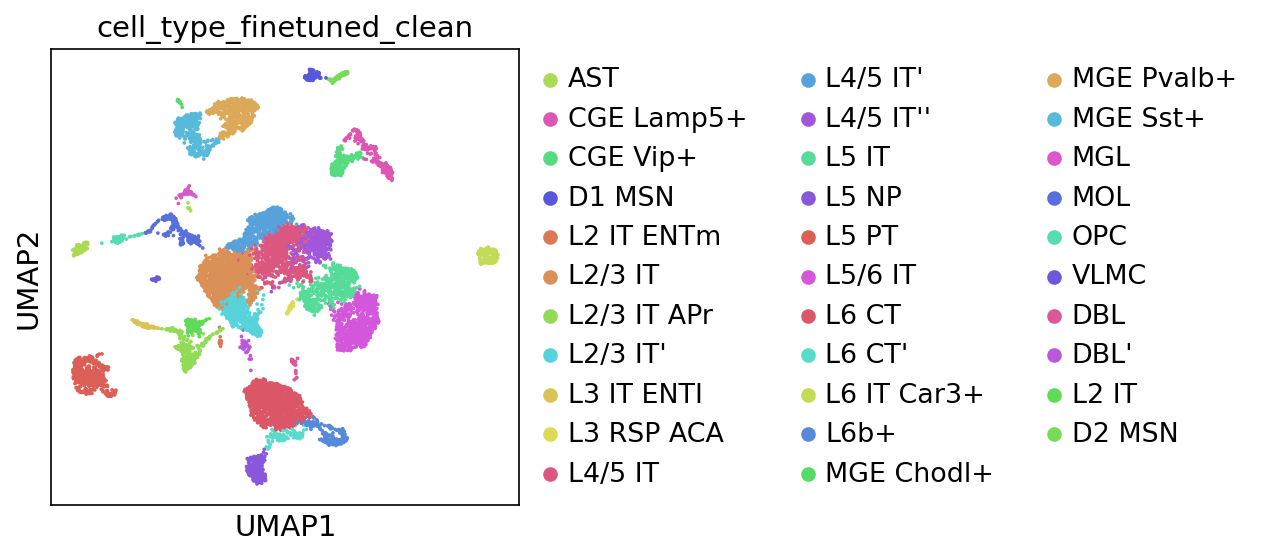

In [64]:
# sc.pl.dotplot(adata, markers_dict_small, 'cell_type', standard_scale='var', colorbar_title='column scaled\nexpression', cmap='viridis', save='dotplot.svg', categories_order=cell_types)
# cmap = sns.color_palette('husl', len(adata.obs['cell_type_collapsed'].unique())
# cmap = sns.color_palette('hls', len(adata.obs['cell_type_collapsed'].unique()))
plt.close()
sc.pl.umap(
    adata,
    color="cell_type_finetuned_clean",
    # save="annotated_collapsed_final_colours.svg",
    palette=cmap2,
)

# Differential gene expression analysis

Calculate differentially expressed genes between all cell types.

In [65]:
sc.tl.rank_genes_groups(adata, groupby="cell_type_finetuned_clean", method="logreg")
markers = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["names"])

ranking genes
/media/data/users/fderop/software/miniconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:54)


And plot them in a dotplot.

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type_finetuned_clean']`


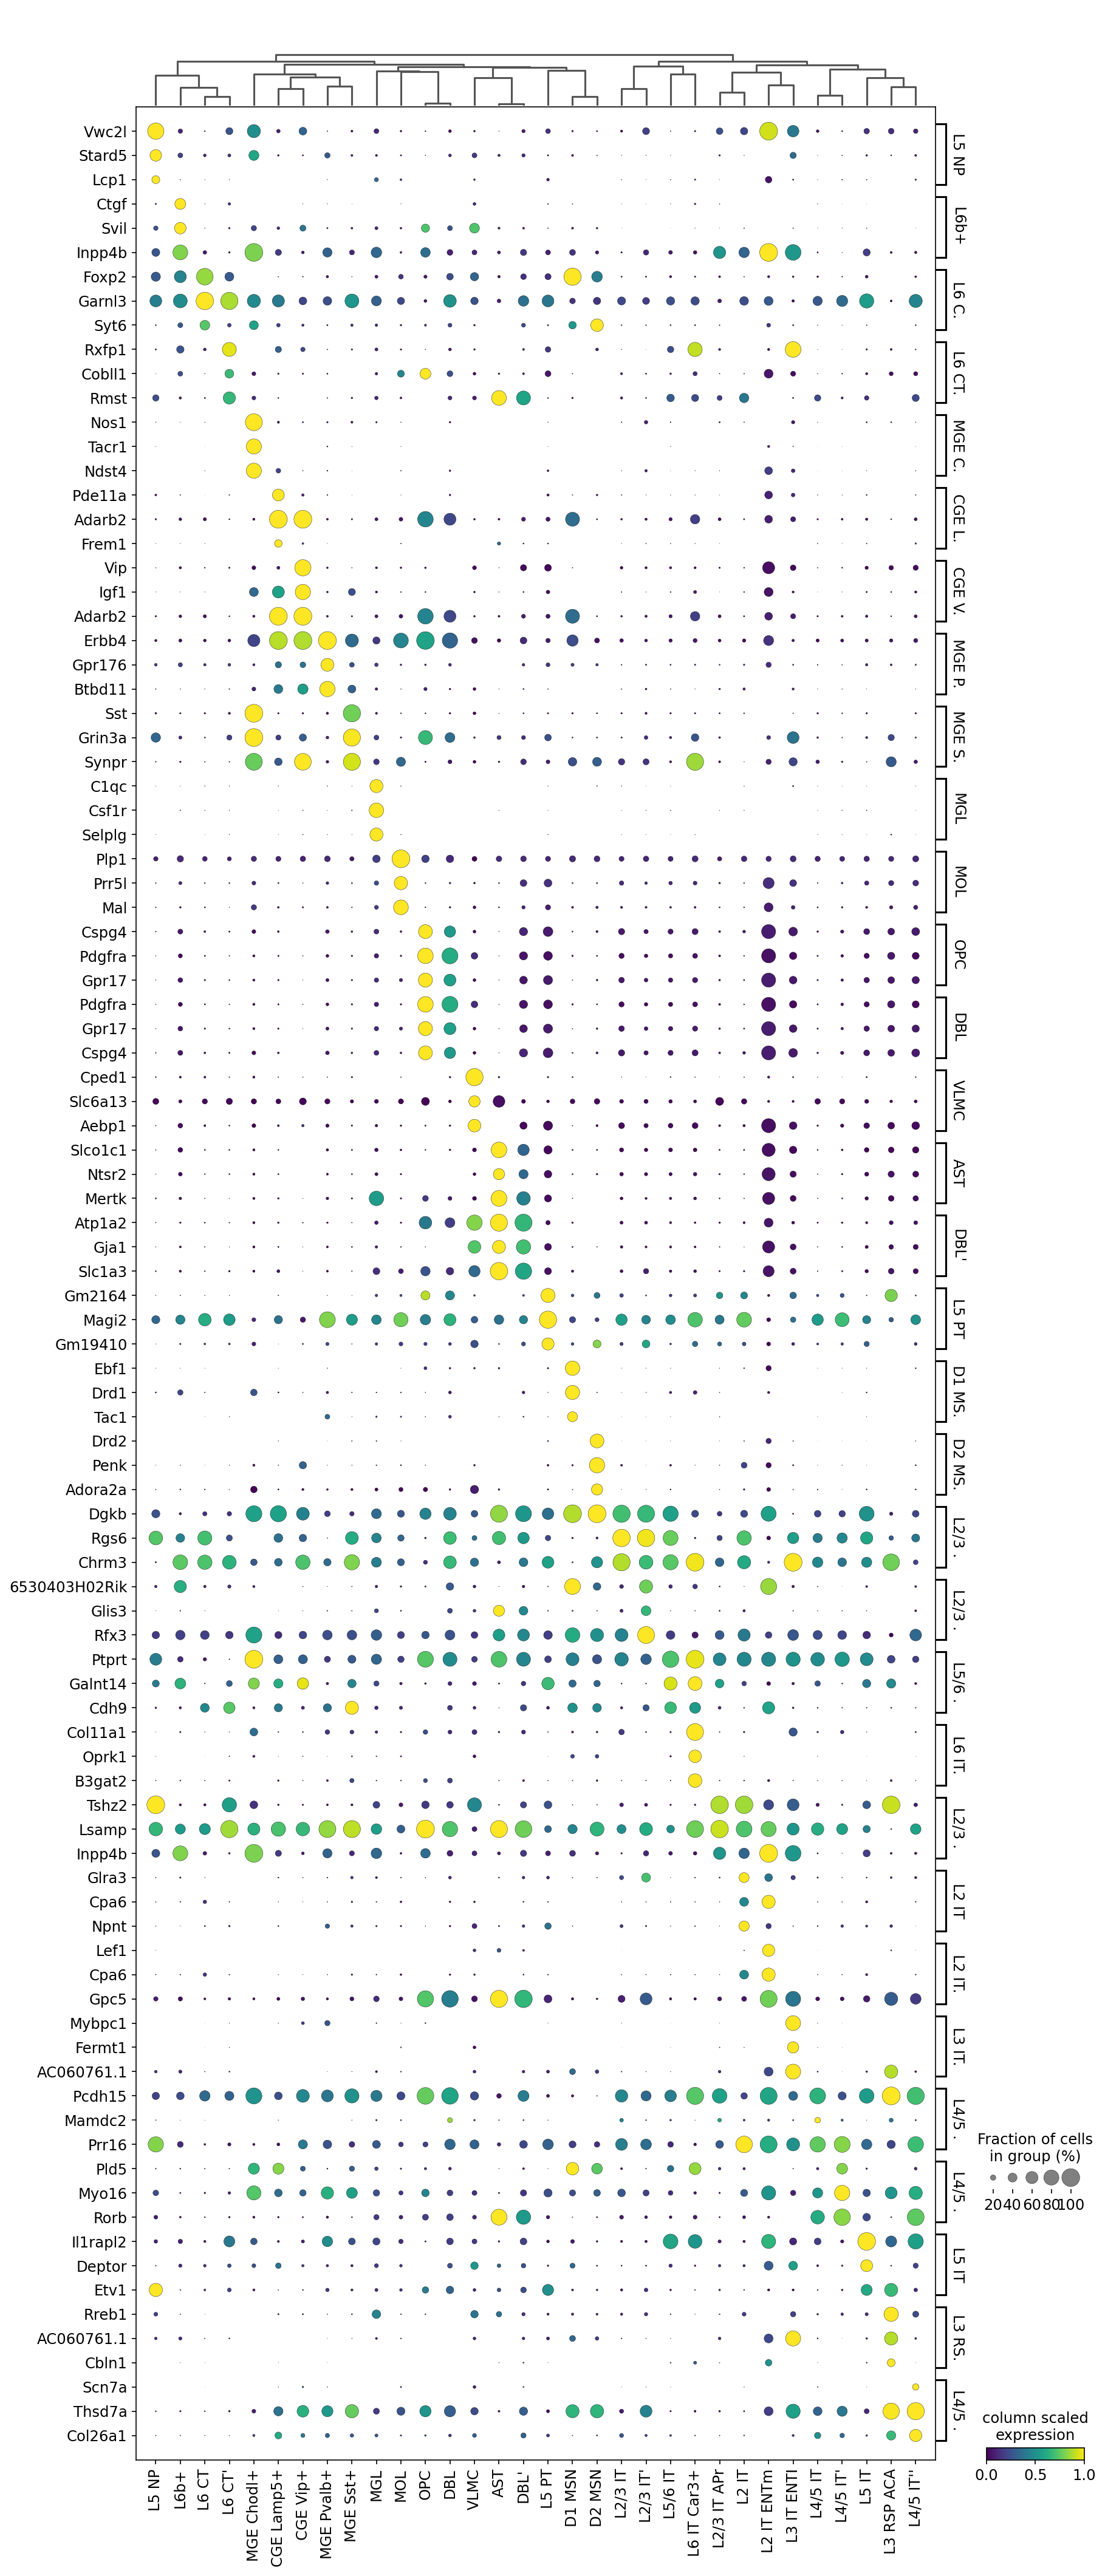

In [66]:
ngenes = 3
mdict = markers.iloc[0:ngenes].to_dict("list")
sc.tl.dendrogram(adata, groupby="cell_type_finetuned_clean")
sc.pl.dotplot(
    adata,
    mdict,
    "cell_type_finetuned_clean",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    cmap="viridis",
    dendrogram=True,
    # save="cluster_markergenes_dotplot_3genes.svg",
    swap_axes=True,
)
# sc.pl.umap(adata, color='cell_type', save='annotated.svg', palette = sns.color_palette('husl', 24))

# Rewrite loom file with cell type annotation

We want our shiny new cell annotation in the loom file for viewing.

In [67]:
# make sure cell types contain no illegal characters such as γ
df = []
meta = []
df = pd.DataFrame(
    adata_raw.X.toarray(), columns=adata_raw.var_names, index=adata_raw.obs_names
).T  # remove .toarray() if not necessary
meta = adata.obs
loomfile = loom_file_creation(df, meta)
meta["UMAP_X"] = adata.obsm["X_umap"][:, 0]
meta["UMAP_Y"] = adata.obsm["X_umap"][:, 1]
loomfile.add_default_embedding(x="UMAP_X", y="UMAP_Y")
meta["TSNE_X"] = adata.obsm["X_tsne"][:, 0]
meta["TSNE_Y"] = adata.obsm["X_tsne"][:, 1]
loomfile.add_other_embedding(x="TSNE_X", y="TSNE_Y", name="tsne")
# loomfile.add_numeric_clustering(res="leiden_0.9",group="leiden_0.9",name="leiden_0.9",annotated='cell_type')
loomfile.add_numeric_clustering(
    res="leiden_1", group="leiden_1", name="leiden_1", annotated="cell_type_1"
)
# loomfile.add_numeric_clustering(res="integrated_snn_res.2",group="Louvain",name="Unannotated")
loomfile.make_col_attributes()
loomfile.make_row_attributes()
# loomfile.add_annotation(annotation="cell_type")
# loomfile.add_annotation(annotation="leiden_1")
loomfile.add_annotation(annotation="leiden_1")
loomfile.add_annotation(annotation="cell_type_finetuned_clean")

loomfile.add_metric(metric="total_counts")
loomfile.add_metric(metric="n_genes")
loomfile.make_attributes()
loomfile.create_loomfile("plts_pub/hydrop-rna_mouse_cortex_finalann_clean.loom")

# Create violinplots

I wanted to visualise both nUMI and nGene in the same violin plot. This requires som wrangling, since seaborn (to my knowledge) does not allow two different axes for the left and right-hand split of the violin plot. The most simple solution for me at the time was to simply generate both violin plots (with global different axis limits) and paste each respective half together in illustrator. In the end, this figure didn't make it to the publication (it was replaced by the comparison between HyDrop, inDrop and Drop-seq in a later iteration), but I did use this exact same technique for the fly neuron data.

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = adata.obs
df_numis = df.copy()
df_ngenes = df.copy()
df_numis['count'] = df['total_counts']
df_ngenes['count'] = df['n_genes']
df_numis['count_type'] = 'numis'
df_ngenes['count_type'] = 'ngenes'
df_count = df_numis.append(df_ngenes, ignore_index=True)

In [74]:
context = "talk"
style = "darkgrid"
markersize = 25
plt.close()
sns.set_context(context)
sns.set_style(style, {"axes.linewidth": 1, "axes.edgecolor": ".20"})

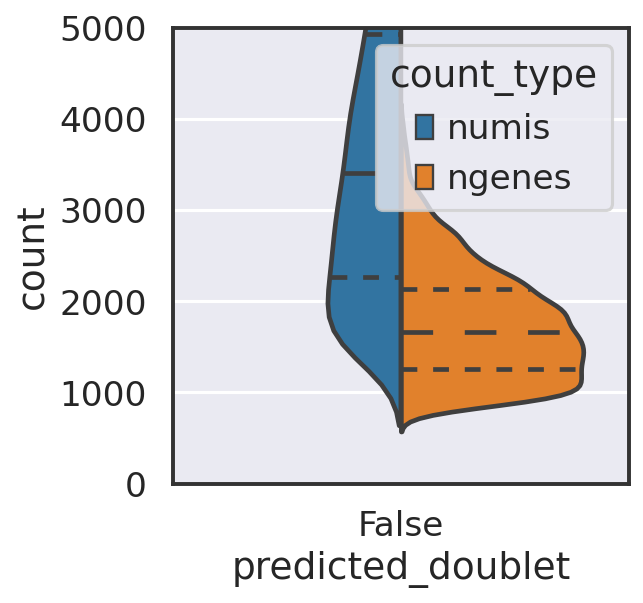

In [75]:
ax = sns.violinplot(data=df_count, y='count', x='predicted_doublet', hue='count_type', split=True, inner="quartile", scale='area')
plt.ylim([0,5000])

ax.set_aspect("equal", adjustable="box")
ax.set_aspect(1.0 / ax.get_data_ratio())
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
# plt.savefig('plts_pub/mouse_counts_ylim5000.svg')
plt.show()

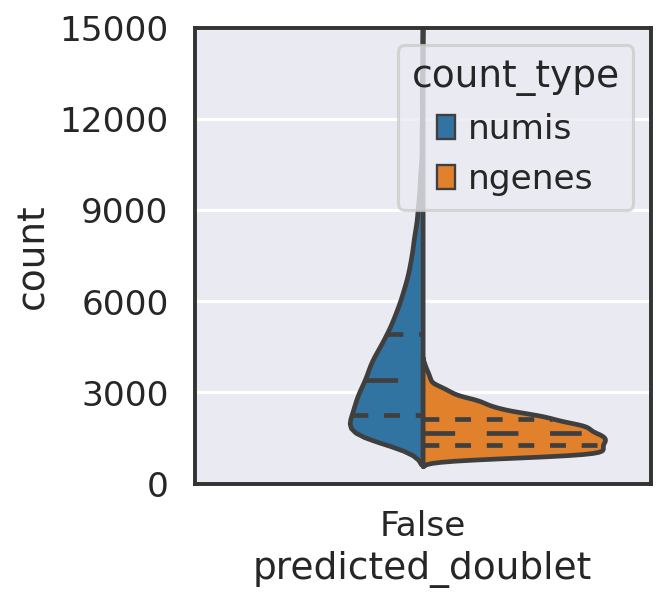

In [77]:
ax = sns.violinplot(data=df_count, y='count', x='predicted_doublet', hue='count_type', split=True, inner="quartile", scale='area')
plt.ylim([0,15000])

ax.set_aspect("equal", adjustable="box")
ax.set_aspect(1.0 / ax.get_data_ratio())
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# plt.savefig('plts_pub/mouse_counts_ylim15000.svg')
plt.show()

# Comparison with public data
We wanted to compare our hydrop data with public data.

In [78]:
import glob as glob

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as sk

## inDrop

get inDrop geo files https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE140883

In [287]:
files = glob.glob("*.tsv")

In [289]:
df_numis_cat = pd.DataFrame()
df_ngenes_cat = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0)
    df_numis = df.sum(axis=1)
    df_ngenes = (df >= 1).astype(int).sum(axis=1)
    df_numis_cat = pd.concat([df_numis_cat, df_numis], axis=0)
    df_ngenes_cat = pd.concat([df_ngenes_cat, df_ngenes], axis=0)

In [291]:
df_ngenes_cat.to_csv('df_ngenes_cat_indrop.csv', sep='\t')
df_numis_cat.to_csv('df_numis_cat_indrop.csv', sep='\t')

The authors describe a minimum gene count of 500 in the main text, but in reality they cut off at minimum 500 umis

In [534]:
df_genes_indrop = pd.read_csv('df_ngenes_cat_indrop.csv', sep='\t')
df_umis_indrop = pd.read_csv('df_numis_cat_indrop.csv', sep='\t')
df_genes_indrop.columns = ['bc', 'genes']
df_umis_indrop.columns = ['bc', 'umis']

In [535]:
df_umis_indrop = df_umis_indrop[df_umis_indrop['umis'] > 500]
df_genes_indrop = df_genes_indrop[df_genes_indrop.index.isin(df_umis_indrop.index)]

In [536]:
df_indrop = df_genes_indrop.copy()
df_indrop['umis'] = df_umis_indrop['umis']
df_indrop['method'] = 'indrop'

In [537]:
df_indrop.median()

genes     886.0
umis     1195.0
dtype: float64

In [538]:
df_indrop_counts = df_indrop.copy()
df_indrop_counts['count'] = df_indrop_counts['umis']
df_indrop_counts['count_type'] = 'umis'
df_indrop_counts2 = df_indrop.copy()
df_indrop_counts2['count'] = df_indrop_counts2['genes']
df_indrop_counts2['count_type'] = 'genes'
df_indrop_counts_merged = pd.concat([df_indrop_counts, df_indrop_counts2])

## Drop-seq data

In [417]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob as glob
import sklearn.preprocessing as sk

In [418]:
files = glob.glob('GSM162679?_P14Retina_?.digital_expression.txt')

In [ ]:
df_numis_cat = pd.DataFrame()
df_ngenes_cat = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0)
    df_numis = df.sum(axis=0)
    df_ngenes = (df >= 1).astype(int).sum(axis=0)
    df_numis_cat = pd.concat([df_numis_cat, df_numis], axis=0)
    df_ngenes_cat = pd.concat([df_ngenes_cat, df_ngenes], axis=0)

In [286]:
df_ngenes_cat.to_csv('df_ngenes_cat_dropseq.csv', sep='\t')
df_numis_cat.to_csv('df_numis_cat_dropseq.csv', sep='\t')

The authors use a filter of minimum 500 genes

In [539]:
df_genes_dropseq = pd.read_csv('df_ngenes_cat_dropseq.csv', sep='\t')
df_umis_dropseq = pd.read_csv('df_numis_cat_dropseq.csv', sep='\t')
df_genes_dropseq.columns = ['bc', 'genes']
df_umis_dropseq.columns = ['bc', 'umis']

In [540]:
df_genes_dropseq = df_genes_dropseq[df_genes_dropseq['genes'] > 500]
df_umis_dropseq = df_umis_dropseq[df_umis_dropseq.index.isin(df_genes_dropseq.index)]

In [541]:
df_dropseq=df_genes_dropseq.copy()
df_dropseq['umis'] = df_umis_dropseq['umis']
df_dropseq['method'] = 'dropseq'

In [542]:
df_dropseq_counts = df_dropseq.copy()
df_dropseq_counts['count'] = df_dropseq_counts['umis']
df_dropseq_counts['count_type'] = 'umis'
df_dropseq_counts2 = df_dropseq.copy()
df_dropseq_counts2['count'] = df_dropseq_counts2['genes']
df_dropseq_counts2['count_type'] = 'genes'
df_dropseq_counts_merged = pd.concat([df_dropseq_counts, df_dropseq_counts2])

## Hydrop

Our data is filtered by star-solo

In [544]:
adata = sc.read('scanpy/20210501_adata.h5ad')
df_genes_hydrop = pd.DataFrame(adata.obs['n_genes'])
df_umis_hydrop = pd.DataFrame(adata.obs['total_counts'])
df_genes_hydrop['bc'] = df_genes_hydrop.index
df_genes_hydrop.columns = ['genes', 'bc']
df_umis_hydrop['bc'] = df_umis_hydrop.index
df_umis_hydrop.columns = ['umis', 'bc']

In [545]:
df_hydrop=df_genes_hydrop.copy()
df_hydrop['umis'] = df_umis_hydrop['umis']
df_hydrop['method'] = 'hydrop'

In [548]:
df_hydrop_counts = df_hydrop.copy()
df_hydrop_counts['count'] = df_hydrop_counts['umis']
df_hydrop_counts['count_type'] = 'umis'
df_hydrop_counts2 = df_hydrop.copy()
df_hydrop_counts2['count'] = df_hydrop_counts2['genes']
df_hydrop_counts2['count_type'] = 'genes'
df_hydrop_counts_merged = pd.concat([df_hydrop_counts, df_hydrop_counts2])

# Merge the datasets to create combined violin plots

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns

In [550]:
context = "talk"
style = "darkgrid"
markersize = 25
plt.close()
sns.set_context(context)
sns.set_style(style, {"axes.linewidth": 1, "axes.edgecolor": ".20"})

In [551]:
df_counts = pd.concat([df_indrop_counts_merged, df_dropseq_counts_merged, df_hydrop_counts_merged])

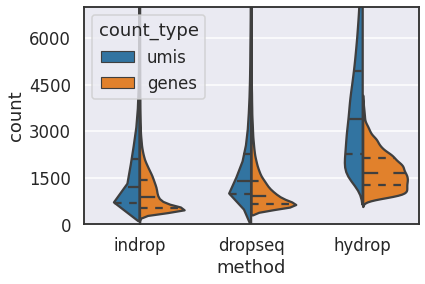

In [552]:
ax = sns.violinplot(data=df_counts, y='count', x='method', hue='count_type', split=True, inner="quartile", size='count')
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public.svg')

plt.show()

In [553]:
df_counts.groupby('method').median()

genes    umis   count
method                         
dropseq   922.0  1389.0  1125.0
hydrop   1662.0  3403.5  2181.0
indrop    886.0  1195.0  1019.0

If we filter on min 500 genes for indrop after all (fewer cells, but higher median/mean genes, closer to what they report in their manuscript):

In [556]:
df_genes_indrop = pd.read_csv('df_ngenes_cat_indrop.csv', sep='\t')
df_umis_indrop = pd.read_csv('df_numis_cat_indrop.csv', sep='\t')
df_genes_indrop.columns = ['bc', 'genes']
df_umis_indrop.columns = ['bc', 'umis']

In [557]:
df_genes_indrop = df_genes_indrop[df_genes_indrop['genes'] > 500]
df_umis_indrop = df_umis_indrop[df_umis_indrop.index.isin(df_genes_indrop.index)]

In [558]:
df_indrop = df_genes_indrop.copy()
df_indrop['umis'] = df_umis_indrop['umis']
df_indrop['method'] = 'indrop'

In [560]:
df_indrop_counts = df_indrop.copy()
df_indrop_counts['count'] = df_indrop_counts['umis']
df_indrop_counts['count_type'] = 'umis'
df_indrop_counts2 = df_indrop.copy()
df_indrop_counts2['count'] = df_indrop_counts2['genes']
df_indrop_counts2['count_type'] = 'genes'
df_indrop_counts_merged = pd.concat([df_indrop_counts, df_indrop_counts2])

In [561]:
df_counts = pd.concat([df_indrop_counts_merged, df_dropseq_counts_merged, df_hydrop_counts_merged])

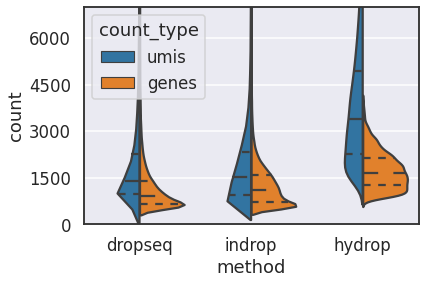

In [562]:
ax = sns.violinplot(data=df_counts, y='count', x='method', hue='count_type', split=True, inner="quartile", size='count', order=[ "dropseq", "indrop", "hydrop"])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public.svg')

plt.show()

In [563]:
df_counts.groupby('method').median()

genes    umis   count
method                         
dropseq   922.0  1389.0  1125.0
hydrop   1662.0  3403.5  2181.0
indrop   1097.0  1521.0  1267.0